In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib
import seaborn as sbn
import matplotlib.pylab as plt
%matplotlib inline

## Data Reading

In [3]:
df = pd.read_csv("train.csv")

C:\Anaconda\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [6]:
df.Date = pd.to_datetime(df.Date)
df.StateHoliday = df.StateHoliday.astype(str)
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
df.StateHoliday.unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [5]:
store = pd.read_csv("store.csv")
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270,9,2008,0,NaN,NaN,NaN
1,2,a,a,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,a,a,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,c,c,620,9,2009,0,NaN,NaN,NaN
4,5,a,a,29910,4,2015,0,NaN,NaN,NaN


## Statistical and Graphical analysis

In [10]:
df = pd.merge(df, store, on='Store')

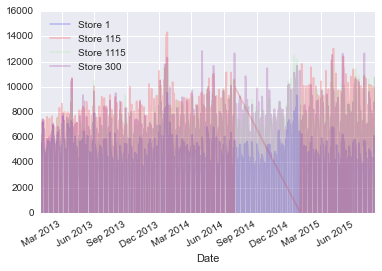

In [54]:
ax = df[df.Store==1].plot(x='Date',y='Sales',color='Blue', label="Store 1",alpha=0.2)
df[df.Store==115].plot(x='Date',y='Sales', color='Red', label="Store 115", ax=ax,alpha=0.2)
df[df.Store==1115].plot(x='Date',y='Sales', color='LightGreen', label="Store 1115", ax=ax,alpha=0.2)
df[df.Store==300].plot(x='Date',y='Sales', color='Purple', label="Store 300", ax=ax,alpha=0.2)

In [59]:
pivot = df.pivot(index='Store',columns='Date',values='Sales')
pivot.head()

Date,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,2013-01-07 00:00:00,2013-01-08 00:00:00,2013-01-09 00:00:00,2013-01-10 00:00:00,...,2015-07-22 00:00:00,2015-07-23 00:00:00,2015-07-24 00:00:00,2015-07-25 00:00:00,2015-07-26 00:00:00,2015-07-27 00:00:00,2015-07-28 00:00:00,2015-07-29 00:00:00,2015-07-30 00:00:00,2015-07-31 00:00:00
Store,,,,,,,,,,,,,,,,,,,,,
1,0,5530,4327,4486,4997,0,7176,5580,5471,4892,...,3464,3769,3706,4364,0,6102,5011,4782,5020,5263
2,0,4422,4159,4484,2342,0,6775,6318,6763,5618,...,5093,4108,3854,2512,0,6627,5671,6402,5567,6064
3,0,6823,5902,6069,4523,0,12247,9800,8001,7772,...,5414,5702,5080,3878,0,8107,8864,7610,8977,8314
4,0,9941,8247,8290,10338,0,12112,10031,8857,9472,...,8503,7286,8322,9322,0,11812,10275,10514,10387,13995
5,0,4253,3465,4456,1590,0,6978,5718,5974,4999,...,3595,3713,3815,2030,0,7059,6083,5899,4943,4822


In [66]:
pivot['median'] = pivot.median(axis=1)
pivot['std'] = pivot.std(axis=1)

In [67]:
pivot.head()

Date,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00,2013-01-07 00:00:00,2013-01-08 00:00:00,2013-01-09 00:00:00,2013-01-10 00:00:00,...,2015-07-24 00:00:00,2015-07-25 00:00:00,2015-07-26 00:00:00,2015-07-27 00:00:00,2015-07-28 00:00:00,2015-07-29 00:00:00,2015-07-30 00:00:00,2015-07-31 00:00:00,median,std
Store,,,,,,,,,,,,,,,,,,,,,
1,0,5530,4327,4486,4997,0,7176,5580,5471,4892,...,3706,4364,0,6102,5011,4782,5020,5263,4373.5,2014.395973
2,0,4422,4159,4484,2342,0,6775,6318,6763,5618,...,3854,2512,0,6627,5671,6402,5567,6064,4395.5,2362.390429
3,0,6823,5902,6069,4523,0,12247,9800,8001,7772,...,5080,3878,0,8107,8864,7610,8977,8314,5892.0,3297.034802
4,0,9941,8247,8290,10338,0,12112,10031,8857,9472,...,8322,9322,0,11812,10275,10514,10387,13995,9062.0,4010.605485
5,0,4253,3465,4456,1590,0,6978,5718,5974,4999,...,3815,2030,0,7059,6083,5899,4943,4822,4180.0,2388.362917


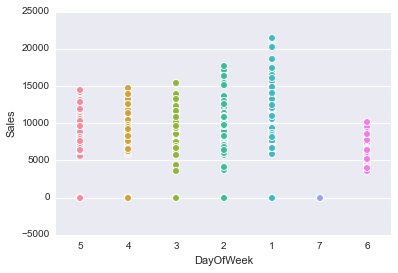

In [96]:
sbn.stripplot(x='DayOfWeek', y='Sales', data = df[df.Store==400])

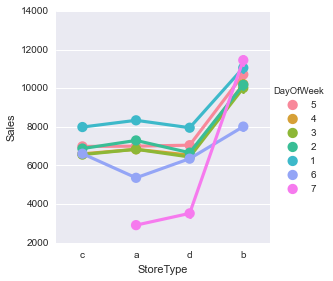

In [107]:
sbn.factorplot(x="StoreType", y="Sales", hue="DayOfWeek", data=df[df.Open==1])

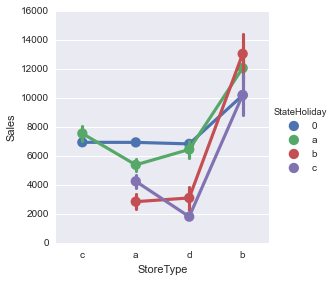

In [106]:
sbn.factorplot(x="StoreType", y="Sales", hue="StateHoliday", data=df[df.Open==1])

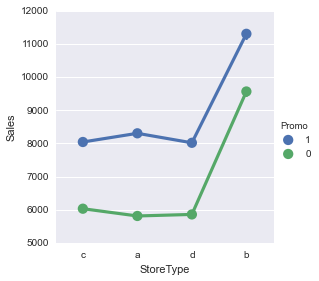

In [112]:
sbn.factorplot(x="StoreType", y="Sales", hue="Promo", data=df[df.Open==1])

## Test Reading

In [47]:
test = pd.read_csv("test.csv")

In [23]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1,1,0,0
1,2,3,4,2015-09-17,1,1,0,0
2,3,7,4,2015-09-17,1,1,0,0
3,4,8,4,2015-09-17,1,1,0,0
4,5,9,4,2015-09-17,1,1,0,0


In [36]:
index_list = ['Store','Open','Promo','StateHoliday','SchoolHoliday','DayOfWeek']
pivot = pd.pivot_table(df, index=index_list,values='Sales',dropna=False,fill_value=0., aggfunc=[np.median,np.mean,np.std])

In [57]:
aggregated = df.groupby(index_list)['Sales'].agg([np.median,np.mean,np.std]).reset_index()

In [58]:
aggregated.head()

,Store,Open,Promo,StateHoliday,SchoolHoliday,DayOfWeek,median,mean,std
0,1,0,0,0,0,7,0,0,0
1,1,0,0,0,1,7,0,0,0
2,1,0,0,a,0,1,0,0,0
3,1,0,0,a,0,4,0,0,0
4,1,0,0,a,1,2,0,0,NaN


In [63]:
test_new = pd.merge(test, aggregated, how='left',on=index_list)

In [64]:
test_new.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,median,mean,std
0,1,1,4,2015-09-17,1,1,0,0,4785.0,4971.641509,828.424317
1,2,3,4,2015-09-17,1,1,0,0,7778.0,7939.648148,979.132349
2,3,7,4,2015-09-17,1,1,0,0,8692.0,9029.035088,1354.217578
3,4,8,4,2015-09-17,1,1,0,0,6844.0,7138.736842,926.983039
4,5,9,4,2015-09-17,1,1,0,0,6579.5,6612.703704,1170.690469


In [91]:
#test['Sales'] = test[['Store','Open']].apply(lambda x: pivot['median'][x.Store] if x.Open==1 else 0, axis=1)
test_new['Sales'] = (test_new['median']+test_new['median'])/2
test_new.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,median,mean,std,Sales
0,1,1,4,2015-09-17,1,1,0,0,4785.0,4971.641509,828.424317,4785.0
1,2,3,4,2015-09-17,1,1,0,0,7778.0,7939.648148,979.132349,7778.0
2,3,7,4,2015-09-17,1,1,0,0,8692.0,9029.035088,1354.217578,8692.0
3,4,8,4,2015-09-17,1,1,0,0,6844.0,7138.736842,926.983039,6844.0
4,5,9,4,2015-09-17,1,1,0,0,6579.5,6612.703704,1170.690469,6579.5


In [92]:
test_new.Id = test_new.Id.astype(int)

In [95]:
test_new.Sales = test_new.Sales.fillna(method='pad')

In [96]:
test_new.Sales.isnull().any()

False

In [97]:
test_new[['Id','Sales']].to_csv('median_mean_submission.csv', index=False)

## featuers

In [13]:
store_feature_list = store.columns

In [14]:
date_feature_list = ['DayOfWeek','Date','Open','Promo','StateHoliday','SchoolHoliday']

Store ID is a categorical data column, which contains 1115 different values. If using **Encoding**, we would need 1115 columns of binary values to represent this single column, which makes this data extremly high dimensional. Instead, we consider using the other features of stores as trainging features. 

In [15]:
df['IntDate'] = df.Date.astype(np.int64)

In [16]:
store_feature_list

Index([u'Store', u'StoreType', u'Assortment', u'CompetitionDistance',
       u'CompetitionOpenSinceMonth', u'CompetitionOpenSinceYear', u'Promo2',
       u'Promo2SinceWeek', u'Promo2SinceYear', u'PromoInterval'],
      dtype='object')

In [17]:
feature_list = list(set(store_feature_list)-set(['Store'])|set(date_feature_list)-set(['Date'])|set(['IntDate']))

In [18]:
feature_list

['DayOfWeek',
 'CompetitionOpenSinceMonth',
 'StateHoliday',
 'Promo',
 'Promo2SinceYear',
 'Promo2SinceWeek',
 'CompetitionDistance',
 'PromoInterval',
 'IntDate',
 'Promo2',
 'CompetitionOpenSinceYear',
 'StoreType',
 'Assortment',
 'Open',
 'SchoolHoliday']

In [111]:
df[feature_list].head()

,DayOfWeek,CompetitionOpenSinceMonth,StateHoliday,Promo,Promo2SinceYear,Promo2SinceWeek,CompetitionDistance,PromoInterval,IntDate,Promo2,CompetitionOpenSinceYear,StoreType,Assortment,Open,SchoolHoliday
0,5,9,0,1,NaN,NaN,1270,NaN,1438300800000000000,0,2008,c,a,1,1
1,4,9,0,1,NaN,NaN,1270,NaN,1438214400000000000,0,2008,c,a,1,1
2,3,9,0,1,NaN,NaN,1270,NaN,1438128000000000000,0,2008,c,a,1,1
3,2,9,0,1,NaN,NaN,1270,NaN,1438041600000000000,0,2008,c,a,1,1
4,1,9,0,1,NaN,NaN,1270,NaN,1437955200000000000,0,2008,c,a,1,1


In [19]:
df['CompDate'] = df[['CompetitionOpenSinceYear','CompetitionOpenSinceMonth','IntDate']].apply(
    lambda row: pd.to_datetime(int(row.CompetitionOpenSinceYear*100+row.CompetitionOpenSinceMonth)
                               ,format='%Y%m') if not np.isnan(row.CompetitionOpenSinceYear) 
    else np.nan, axis=1)
                          

In [188]:
pd.isnull(df['Date'][10362])

False

In [20]:
df['DaysSinceCompetition'] = df[['Date','CompDate']].apply(lambda x: (x.Date-x.CompDate).days if 
                                                           not pd.isnull(x.CompDate) else np.nan, axis=1)

In [110]:
df['DayOfYear'] = df.Date.apply(lambda x: x.dayofyear)

In [21]:
date_feature_list = list(set(date_feature_list)-set(['Date'])|set(['IntDate','DaysSinceCompetition']))

In [22]:
store_feature_list = list(set(store_feature_list)-set(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear','PromoInterval']))

In [23]:
df[date_feature_list+store_feature_list].head()

,DayOfWeek,IntDate,StateHoliday,Promo,DaysSinceCompetition,Open,SchoolHoliday,Assortment,CompetitionDistance,Promo2,StoreType,Store
0,5,1438300800000000000,0,1,2524,1,1,a,1270,0,c,1
1,4,1438214400000000000,0,1,2523,1,1,a,1270,0,c,1
2,3,1438128000000000000,0,1,2522,1,1,a,1270,0,c,1
3,2,1438041600000000000,0,1,2521,1,1,a,1270,0,c,1
4,1,1437955200000000000,0,1,2520,1,1,a,1270,0,c,1


In [24]:
feature_list = date_feature_list+store_feature_list

In [25]:
X = df[feature_list]
X.head()

,DayOfWeek,IntDate,StateHoliday,Promo,DaysSinceCompetition,Open,SchoolHoliday,Assortment,CompetitionDistance,Promo2,StoreType,Store
0,5,1438300800000000000,0,1,2524,1,1,a,1270,0,c,1
1,4,1438214400000000000,0,1,2523,1,1,a,1270,0,c,1
2,3,1438128000000000000,0,1,2522,1,1,a,1270,0,c,1
3,2,1438041600000000000,0,1,2521,1,1,a,1270,0,c,1
4,1,1437955200000000000,0,1,2520,1,1,a,1270,0,c,1


In [26]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [45]:
X.dtypes
X.DayOfWeek = X.DayOfWeek.astype(object)

DayOfWeek                object
IntDate                   int64
StateHoliday             object
Promo                     int64
DaysSinceCompetition    float64
Open                      int64
SchoolHoliday             int64
Assortment               object
CompetitionDistance     float64
Promo2                    int64
StoreType                object
Store                     int64
dtype: object

In [44]:
cat_columns = ['DayOfWeek','StateHoliday','Assortment','StoreType']

In [158]:
from sklearn import base

###This transformer is for converting categorical data to numerical data 
class CatIntTrans(base.BaseEstimator, base.TransformerMixin):
    
    def __init__(self):
        self.catcols = {}
        #self.column_list = c
    
    def fit(self, X, y=None):
    # fit the transformation ...
        for col in X.columns.values:
            if X[col].dtype==object:
                le = LabelEncoder()
                encoder = OneHotEncoder()
                X_new = le.fit_transform(X[col])
                encoder.fit(X_new[:, np.newaxis])
                self.catcols[col] = [le, encoder]
        return self    
    
    def transform(self, X):
        X_trans = X.copy()
        new_columns = list(set(X.columns.values)-set(self.catcols.keys()))
        for col in self.catcols:
            X_trans = pd.concat([X_trans, pd.DataFrame(self.catcols[col][1].transform(self.catcols[col][0].transform(X_trans[col])[:, np.newaxis]).todense(), columns=[col+'_'+name for name in self.catcols[col][0].classes_])], axis=1)
            new_columns += [col+'_'+str(name) for name in self.catcols[col][0].classes_]
        return X_trans[new_columns]


In [49]:
cat_int_trans = CatIntTrans()
X_clean = cat_int_trans.fit_transform(X)

In [50]:
X_clean.head()

,Promo,DaysSinceCompetition,CompetitionDistance,Promo2,IntDate,Open,SchoolHoliday,Store,DayOfWeek_1,DayOfWeek_2,...,Assortment_b,Assortment_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,2524,1270,0,1438300800000000000,1,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1,1,2523,1270,0,1438214400000000000,1,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1,2522,1270,0,1438128000000000000,1,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,1,2521,1270,0,1438041600000000000,1,1,1,0,1,...,0,0,0,0,1,0,1,0,0,0
4,1,2520,1270,0,1437955200000000000,1,1,1,1,0,...,0,0,0,0,1,0,1,0,0,0


In [51]:
X_clean = X_clean.fillna(method='pad')
X_clean.head()

,Promo,DaysSinceCompetition,CompetitionDistance,Promo2,IntDate,Open,SchoolHoliday,Store,DayOfWeek_1,DayOfWeek_2,...,Assortment_b,Assortment_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,2524,1270,0,1438300800000000000,1,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1,1,2523,1270,0,1438214400000000000,1,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1,2522,1270,0,1438128000000000000,1,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,1,2521,1270,0,1438041600000000000,1,1,1,0,1,...,0,0,0,0,1,0,1,0,0,0
4,1,2520,1270,0,1437955200000000000,1,1,1,1,0,...,0,0,0,0,1,0,1,0,0,0


In [80]:
X_open = X_clean[X_clean.Open==1]
Y_open = df.Sales[X_clean.Open==1]
X_open.head()

,Promo,DaysSinceCompetition,CompetitionDistance,Promo2,IntDate,Open,SchoolHoliday,Store,DayOfWeek_1,DayOfWeek_2,...,Assortment_b,Assortment_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,1,2524,1270,0,1438300800000000000,1,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
1,1,2523,1270,0,1438214400000000000,1,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,1,2522,1270,0,1438128000000000000,1,1,1,0,0,...,0,0,0,0,1,0,1,0,0,0
3,1,2521,1270,0,1438041600000000000,1,1,1,0,1,...,0,0,0,0,1,0,1,0,0,0
4,1,2520,1270,0,1437955200000000000,1,1,1,1,0,...,0,0,0,0,1,0,1,0,0,0


In [83]:
Y_open.head()

0    5263
1    5020
2    4782
3    5011
4    6102
Name: Sales, dtype: int64

In [81]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_open)

In [62]:
X_train.shape

(844392L, 26L)

In [85]:
Y_train = np.array(Y_open)
Y_train.shape

(844392L,)

In [86]:
from sklearn.utils import shuffle
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

In [87]:
from sklearn.cross_validation import KFold
kf = KFold(len(Y_train), random_state=42)

### train on clean data without differentiating open status

In [291]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
for train_ind, test_ind in kf:
    forest.fit(X_clean.iloc[train_ind], Y.iloc[train_ind])
    print forest.score(X_clean.iloc[test_ind], Y.iloc[test_ind])

-0.262331016301
-0.208038798099
-0.235838257157


In [294]:
print forest.predict(X_clean[test_ind])
print Y[test_ind]

[ 7102.4  5506.8  6668.6 ...,  3610.2  5826.4  5606. ]
678140      9624
678141     10018
678142     13236
678143         0
678144      3011
678145      7543
678146         0
678147      5906
678148      5738
678149      7392
678150         0
678151      3207
678152      8912
678153      7606
678154      9017
678155      9509
678156     11731
678157         0
678158      3017
678159      5717
678160      5582
678161      5677
678162      5747
678163      5803
678164         0
678165      3014
678166      8296
678167      8513
678168      9054
678169     10293
           ...  
1017179     3813
1017180     3397
1017181     3615
1017182        0
1017183     4896
1017184     5082
1017185     5650
1017186     5176
1017187     5388
1017188     3723
1017189        0
1017190     5207
1017191     4287
1017192     3039
1017193     3064
1017194     3528
1017195     3158
1017196        0
1017197     4497
1017198     5142
1017199     5007
1017200     4649
1017201     5243
1017202     6905
1017203   

In [296]:
temp = forest.predict(X_clean[test_ind])
temp[:20]

array([  7102.4       ,   5506.8       ,   6668.6       ,   6102.9       ,
         5606.8       ,   5799.2       ,   5754.2       ,   7594.1       ,
         6212.3       ,   4235.06666667,   5901.3       ,   5514.6       ,
         3469.9       ,   6243.2       ,   2659.7       ,   7164.7       ,
         5421.3       ,   5506.4       ,  11749.8       ,   3580.3       ])

### Train on filtered data that is open

In [88]:
print X_train.shape, Y_train.shape

(844392L, 26L) (844392L,)


In [392]:
### 2nd submission
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
for train_ind, test_ind in kf:
    forest.fit(X_train.iloc[train_ind], Y_train.iloc[train_ind])
    print forest.score(X_train.iloc[test_ind], Y_train.iloc[test_ind])

0.877327814294
0.877435824846
0.8764278093


In [89]:
### 3rd submission
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
for train_ind, test_ind in kf:
    forest.fit(X_train[train_ind], Y_train[train_ind])
    print forest.score(X_train[test_ind], Y_train[test_ind])

0.878668169862
0.877205501246
0.876474068464


In [393]:
forest.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [467]:
Y_predict = forest.predict(X_train)

In [468]:
Y_predict[:20]

array([  6485. ,   7869.8,   6895.8,   8153.7,   4343.2,   7641. ,
         7556.6,   4368.1,   5612.8,   5880.5,   8007.4,   3901.2,
         2577.9,   3710.1,   6088.9,  11483.6,   3710.1,   5463.2,
         6682.7,   7267.3])

In [401]:
test = pd.merge(test, store, on='Store')
test.Date = pd.to_datetime(test.Date)
test['IntDate'] = test.Date.astype(np.int64)
test['CompDate'] = test[['CompetitionOpenSinceYear','CompetitionOpenSinceMonth','IntDate']].apply(
    lambda row: pd.to_datetime(int(row.CompetitionOpenSinceYear*100+row.CompetitionOpenSinceMonth)
                               ,format='%Y%m') if not np.isnan(row.CompetitionOpenSinceYear) 
    else np.nan, axis=1)
test['DaysSinceCompetition'] = test[['Date','CompDate']].apply(lambda x: (x.Date-x.CompDate).days if 
                                                           not pd.isnull(x.CompDate) else np.nan, axis=1)

In [402]:
test['Sales'] = 0

In [410]:
test = test.fillna(test.mean())

In [417]:
test[feature_list].dtypes

DayOfWeek                 int64
IntDate                   int64
StateHoliday             object
Promo                     int64
DaysSinceCompetition    float64
Open                    float64
SchoolHoliday             int64
Assortment               object
CompetitionDistance     float64
Promo2                    int64
StoreType                object
Store                     int64
dtype: object

In [418]:
print test['StateHoliday'].unique()
print X['StateHoliday'].unique()
print test['StoreType'].unique()
print X['StoreType'].unique()
print test['Assortment'].unique()
print X['Assortment'].unique()

['0' 'a']
['0' 'a' 'b' 'c']
['c' 'a' 'd' 'b']
['c' 'a' 'd' 'b']
['a' 'c' 'b']
['a' 'c' 'b']


In [458]:
test_trans = cat_int_trans.transform(test[feature_list])

In [469]:
test_trans.head()

,DayOfWeek,Promo,DaysSinceCompetition,CompetitionDistance,Promo2,IntDate,Open,SchoolHoliday,Store,Assortment_a,Assortment_b,Assortment_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c
0,4,1,2572,1270,0,1442448000000000000,1,0,1,1,0,0,0,0,1,0,1,0,0,0
1,3,1,2571,1270,0,1442361600000000000,1,0,1,1,0,0,0,0,1,0,1,0,0,0
2,2,1,2570,1270,0,1442275200000000000,1,0,1,1,0,0,0,0,1,0,1,0,0,0
3,1,1,2569,1270,0,1442188800000000000,1,0,1,1,0,0,0,0,1,0,1,0,0,0
4,7,0,2568,1270,0,1442102400000000000,0,0,1,1,0,0,0,0,1,0,1,0,0,0


In [459]:
test_scale = scaler.transform(test_trans)

In [462]:
test.Sales = forest.predict(test_scale)

In [463]:
test.Sales[test.Open==0] = 0

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [476]:
test[['Id','Sales']].sort('Id').to_csv('random_forest.csv', index=False)

In [478]:
print feature_list

['DayOfWeek', 'IntDate', 'StateHoliday', 'Promo', 'DaysSinceCompetition', 'Open', 'SchoolHoliday', 'Assortment', 'CompetitionDistance', 'Promo2', 'StoreType', 'Store']


## With fewer features

In [111]:
df.columns

Index([u'Store', u'DayOfWeek', u'Date', u'Sales', u'Customers', u'Open',
       u'Promo', u'StateHoliday', u'SchoolHoliday', u'StoreType',
       u'Assortment', u'CompetitionDistance', u'CompetitionOpenSinceMonth',
       u'CompetitionOpenSinceYear', u'Promo2', u'Promo2SinceWeek',
       u'Promo2SinceYear', u'PromoInterval', u'IntDate', u'CompDate',
       u'DaysSinceCompetition', u'DayOfYear'],
      dtype='object')

In [113]:
feature_few = ['Store', 'DayOfWeek', 'DayOfYear', 'IntDate', 'Open',
       'Promo', 'StateHoliday', 'SchoolHoliday']

In [122]:
X = df[feature_few]
Y = df.Sales

In [123]:
X.DayOfWeek = X.DayOfWeek.astype(object)
X.dtypes

Store             int64
DayOfWeek        object
DayOfYear         int64
IntDate           int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [124]:
cat_int_trans_few = CatIntTrans()
X_scaled = cat_int_trans_few.fit_transform(X)

In [125]:
X_clean = X_scaled[X.Open==1]
Y_clean = Y[X.Open==1]

In [126]:
scaler_few = StandardScaler()
X_train = scaler_few.fit_transform(X_clean)
Y_train = np.array(Y_clean)

In [127]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

In [128]:
### 3rd submission 
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
for train_ind, test_ind in kf:
    forest.fit(X_train[train_ind], Y_train[train_ind])
    print forest.score(X_train[test_ind], Y_train[test_ind])

0.685237101267
0.65854308453
0.685858297224


In [129]:
forest.feature_importances_

array([  1.35605394e-01,   7.05344985e-02,   3.97129800e-02,
         0.00000000e+00,   7.76204452e-03,   6.80884479e-01,
         3.26165057e-02,   3.21795009e-03,   2.21530619e-03,
         2.11276855e-03,   3.50605266e-03,   1.76703654e-02,
         2.75871146e-03,   8.06793572e-04,   3.87568982e-04,
         1.90858091e-04,   1.77232904e-05])

In [131]:
X_clean.columns

Index([u'Promo', u'DayOfYear', u'IntDate', u'Open', u'SchoolHoliday', u'Store',
       u'DayOfWeek_1', u'DayOfWeek_2', u'DayOfWeek_3', u'DayOfWeek_4',
       u'DayOfWeek_5', u'DayOfWeek_6', u'DayOfWeek_7', u'StateHoliday_0',
       u'StateHoliday_a', u'StateHoliday_b', u'StateHoliday_c'],
      dtype='object')

### Many features

In [132]:
X.Store = X.Store.astype(object)
X.dtypes

Store            object
DayOfWeek        object
DayOfYear         int64
IntDate           int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

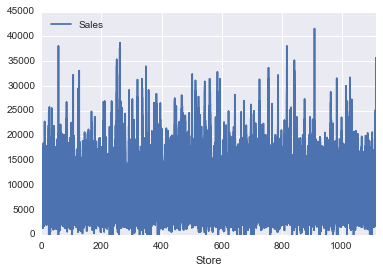

In [135]:
df[df.Open==1].plot(x='Store',y='Sales')

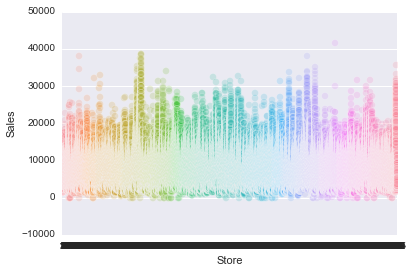

In [137]:
sbn.stripplot(x='Store',y='Sales',data=df[df.Open==1], alpha=0.2)

In [147]:
feature_more = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionDistance','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval','IntDate','DaysSinceCompetition','DayOfYear']

In [175]:
X.dtypes

DayOfWeek                 int32
Open                      int64
Promo                     int64
StateHoliday             object
SchoolHoliday             int64
StoreType                object
Assortment               object
CompetitionDistance     float64
Promo2                    int64
Promo2SinceWeek         float64
Promo2SinceYear         float64
PromoInterval            object
IntDate                   int64
DaysSinceCompetition    float64
DayOfYear                 int64
dtype: object

In [184]:
X = df[feature_more]
X = X.fillna(0)
X.PromoInterval = X.PromoInterval.astype(str).astype(object)
X.head()

,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,IntDate,DaysSinceCompetition,DayOfYear
0,5,1,1,0,1,c,a,1270,0,0,0,0,1438300800000000000,2524,212
1,4,1,1,0,1,c,a,1270,0,0,0,0,1438214400000000000,2523,211
2,3,1,1,0,1,c,a,1270,0,0,0,0,1438128000000000000,2522,210
3,2,1,1,0,1,c,a,1270,0,0,0,0,1438041600000000000,2521,209
4,1,1,1,0,1,c,a,1270,0,0,0,0,1437955200000000000,2520,208


In [185]:
X.PromoInterval.unique()

array(['0', 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'], dtype=object)

In [186]:
cat_int_trans_more = CatIntTrans()
X_clean = cat_int_trans_more.fit_transform(X)

In [187]:
X_train = X_clean[df.Open==1]
X_train = scaler.fit_transform(X_train)
Y_train = np.array(df[df.Open==1].Sales)

In [188]:
X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

In [189]:
X_train.shape

(844392L, 26L)

In [190]:
### 3rd submission 
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
for train_ind, test_ind in kf:
    forest.fit(X_train[train_ind], Y_train[train_ind])
    print forest.score(X_train[test_ind], Y_train[test_ind])

0.871845975441
0.872795427092
0.872004983457


In [191]:
### 3rd submission 
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(max_depth=20)
for train_ind, test_ind in kf:
    forest.fit(X_train[train_ind], Y_train[train_ind])
    print forest.score(X_train[test_ind], Y_train[test_ind])

0.823687943436
0.828820524617
0.827822297165
